<a href="https://colab.research.google.com/github/mohitsaini1166/VANSHIKA-ECOMMERCE-SALES-DATA-POWERBI/blob/main/loan_approval_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
# remove extra space from column names
df.columns = df.columns.str.strip()

print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


#***VISUALIZATION STEPS***

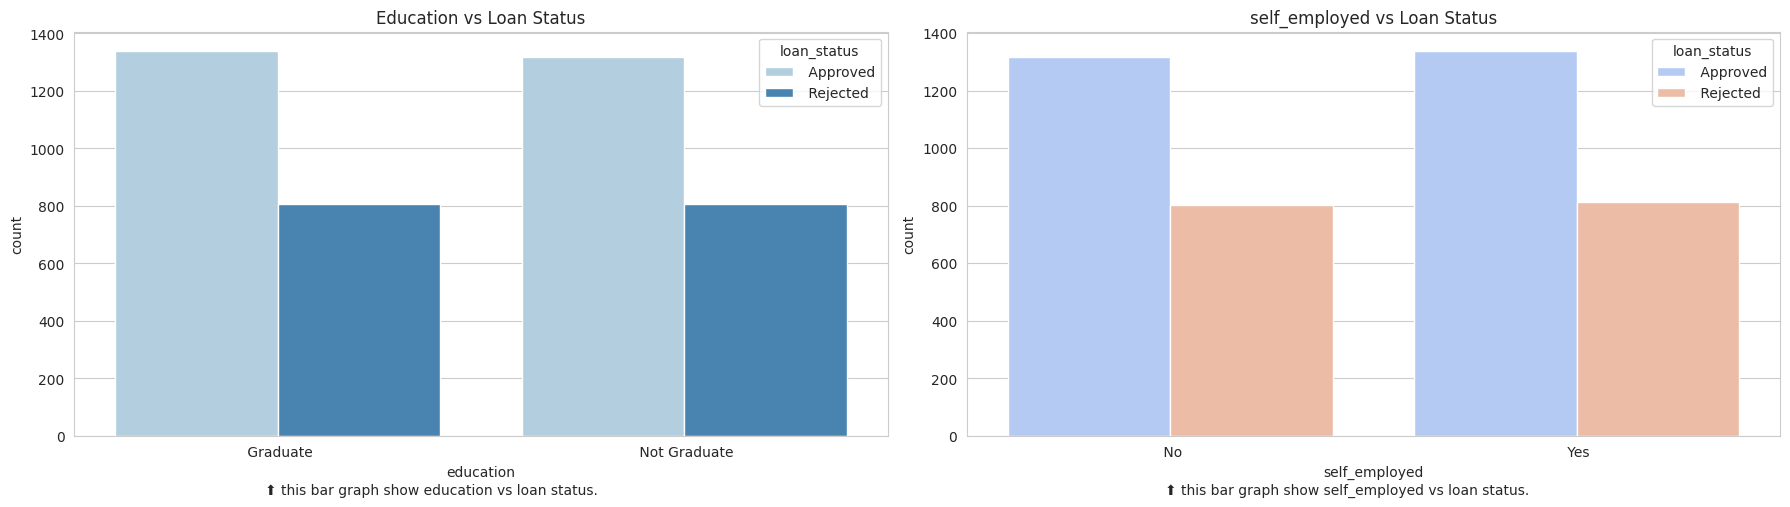

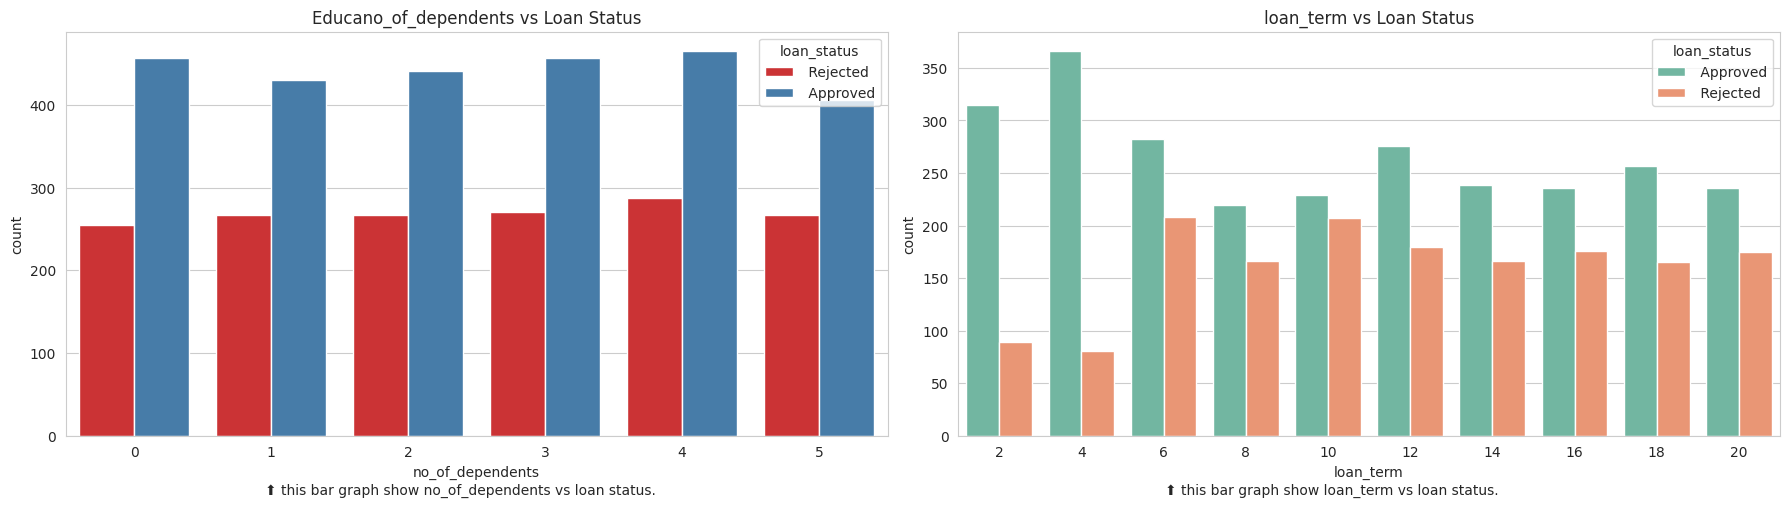

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1,2, figsize = (18,5))

sns.countplot(x="education", hue="loan_status", data=df, palette="Blues", ax = axes[0])
axes[0].set_title("Education vs Loan Status")
plt.figtext(0.15,0.001,"⬆️ this bar graph show education vs loan status.")

sns.countplot(x="self_employed", hue="loan_status", data=df, palette="coolwarm", ax = axes[1])
axes[1].set_title("self_employed vs Loan Status")
plt.figtext(0.65,0.001,"⬆️ this bar graph show self_employed vs loan status.")
plt.tight_layout()
plt.show()


##
sns.set_style("whitegrid")

fig, axes = plt.subplots(1,2, figsize = (18,5))

sns.countplot(x="no_of_dependents", hue="loan_status", data=df, palette="Set1", ax = axes[0])
axes[0].set_title("Educano_of_dependents vs Loan Status")
plt.figtext(0.15,0.001,"⬆️ this bar graph show no_of_dependents vs loan status.")

sns.countplot(x="loan_term", hue="loan_status", data=df, palette="Set2", ax = axes[1])
axes[1].set_title("loan_term vs Loan Status")
plt.figtext(0.65,0.001,"⬆️ this bar graph show loan_term vs loan status.")
plt.tight_layout()
plt.show()

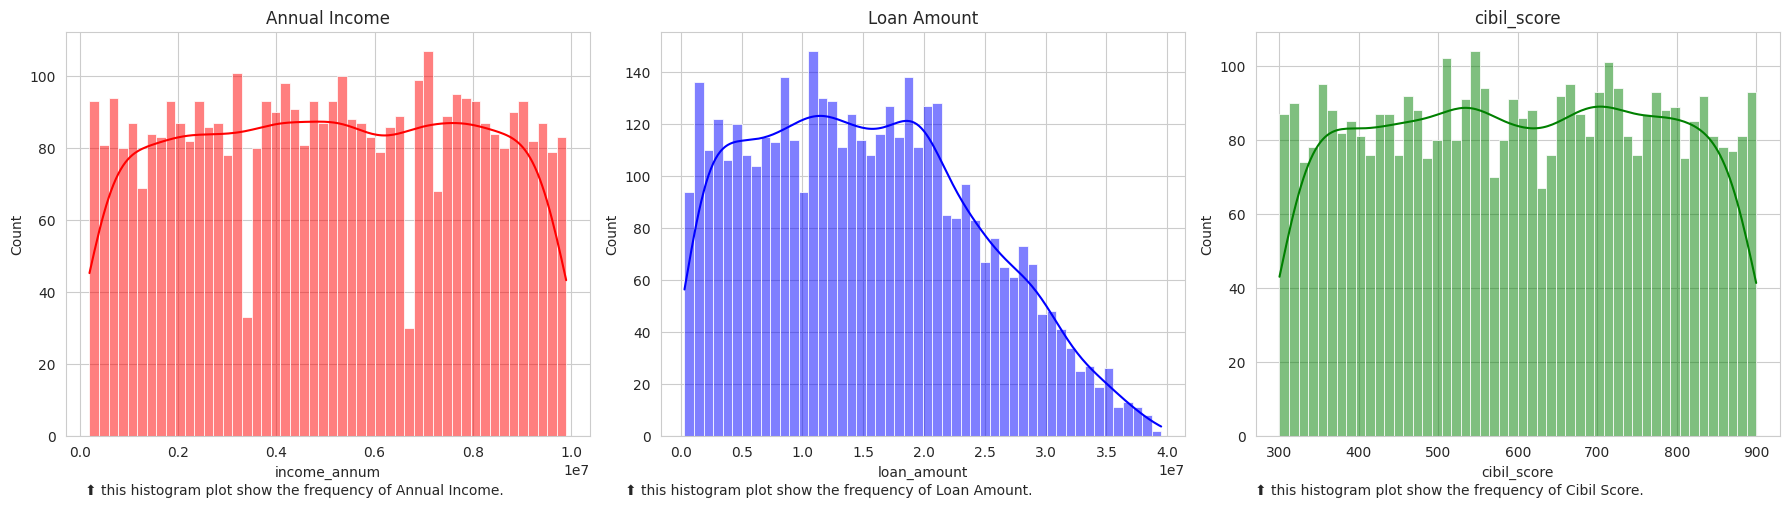

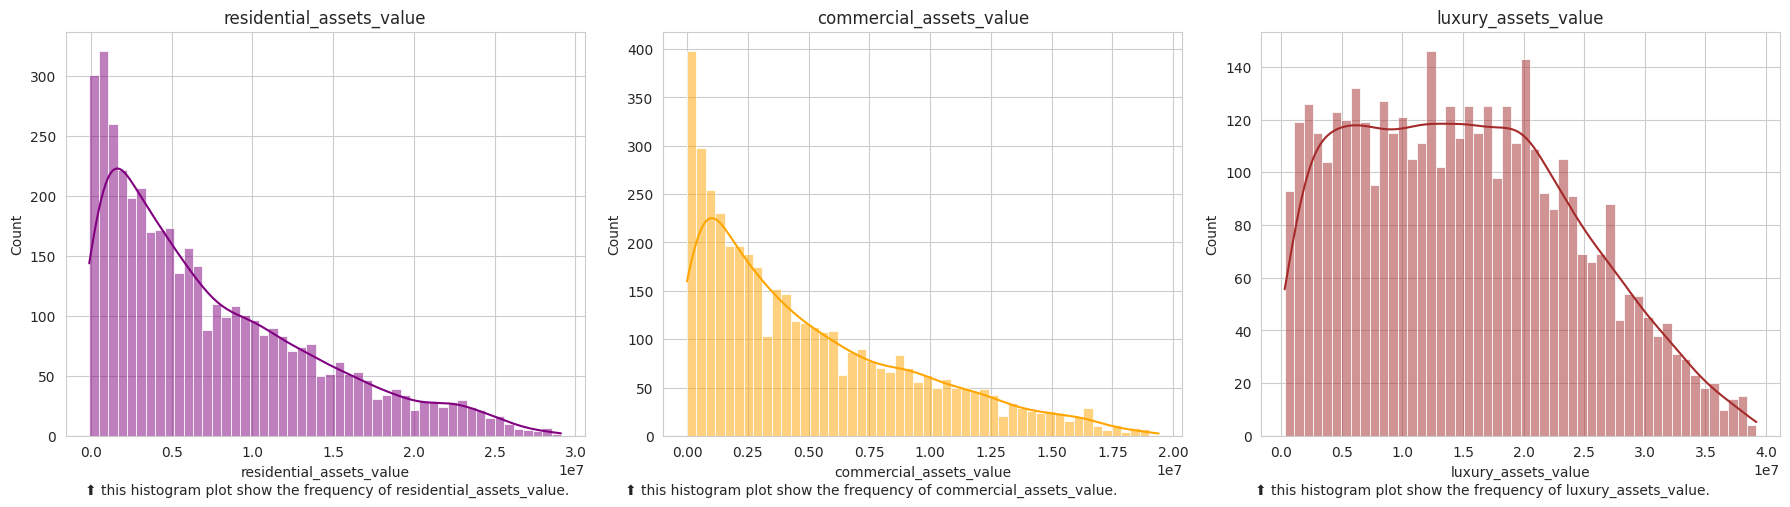

In [ ]:
# Histogram Plots

sns.set_style("whitegrid")
fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.histplot(df["income_annum"],bins=50,kde=True,color="red",ax=axes[0])
axes[0].set_title("Annual Income")
plt.figtext(0.05,0.001,"⬆️ this histogram plot show the frequency of Annual Income.")

sns.histplot(df["loan_amount"],bins=50,kde=True,color="blue",ax=axes[1])
axes[1].set_title("Loan Amount")
plt.figtext(0.35,0.001,"⬆️ this histogram plot show the frequency of Loan Amount.")

sns.histplot(df["cibil_score"],bins=50,kde=True,color="green",ax=axes[2])
axes[2].set_title("cibil_score")
plt.figtext(0.70,0.001,"⬆️ this histogram plot show the frequency of Cibil Score.")

plt.tight_layout()
plt.show()

#####

sns.set_style("whitegrid")
fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.histplot(df["residential_assets_value"],bins=50,kde=True,color="purple",ax=axes[0])
axes[0].set_title("residential_assets_value")
plt.figtext(0.05,0.001,"⬆️ this histogram plot show the frequency of residential_assets_value.")

sns.histplot(df["commercial_assets_value"],bins=50,kde=True,color="orange",ax=axes[1])
axes[1].set_title("commercial_assets_value")
plt.figtext(0.35,0.001,"⬆️ this histogram plot show the frequency of commercial_assets_value.")

sns.histplot(df["luxury_assets_value"],bins=50,kde=True,color="brown",ax=axes[2])
axes[2].set_title("luxury_assets_value")
plt.figtext(0.70,0.001,"⬆️ this histogram plot show the frequency of luxury_assets_value.")

plt.tight_layout()
plt.show()


<ipython-input-11-9a95a8a7a419>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["bank_asset_value"],bins=50,kde=True,palette="coolwarm")


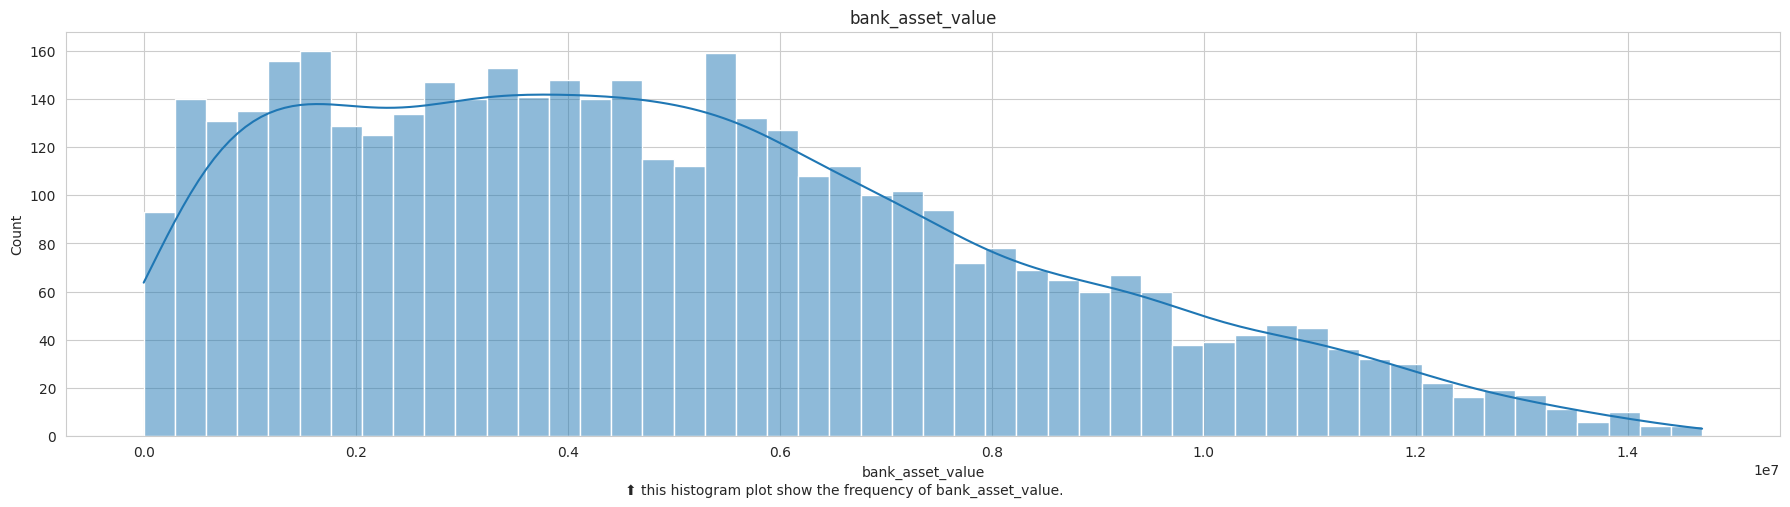

In [ ]:
# Histogram of bank_asset_value

plt.figure(figsize = (18,5))
sns.histplot(df["bank_asset_value"],bins=50,kde=True,palette="coolwarm")
plt.title("bank_asset_value")
plt.figtext(0.35,0.001,"⬆️ this histogram plot show the frequency of bank_asset_value.")
plt.tight_layout()
plt.show()

# Check Outliers

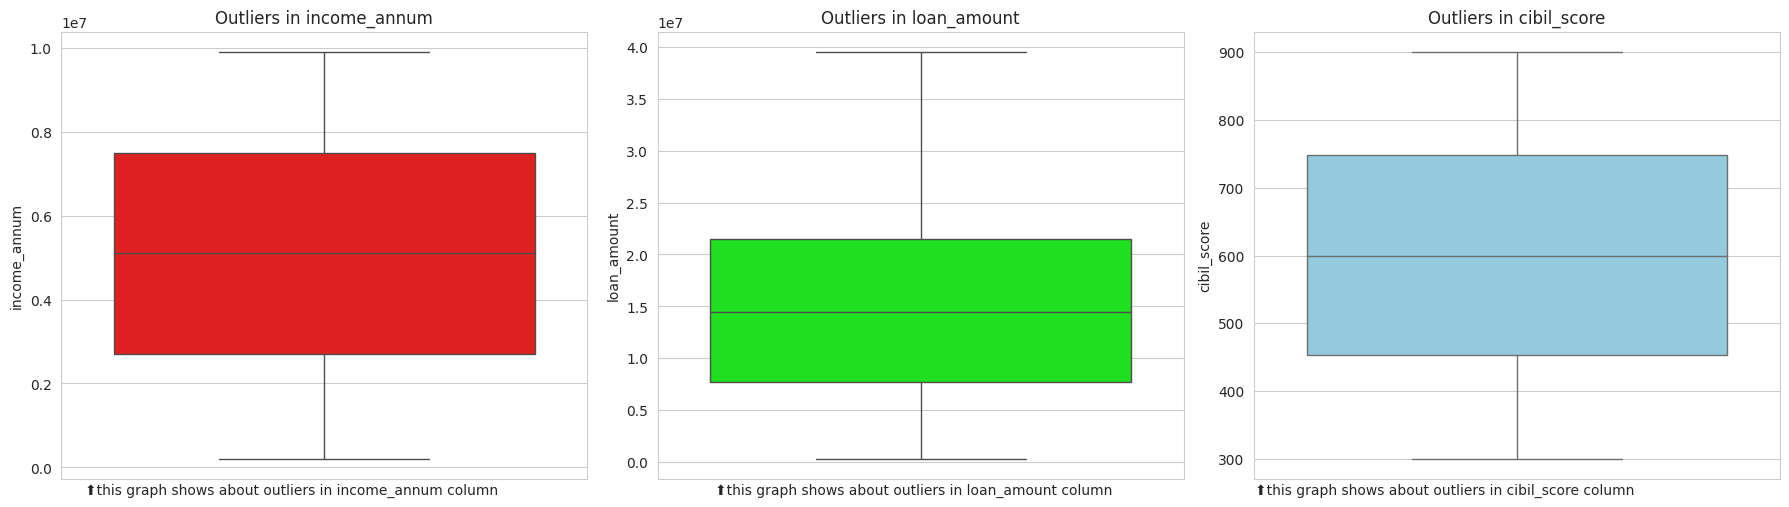

In [ ]:
#Outliers Finding Graphs
sns.set_style("whitegrid")
fig,axes = plt.subplots(1,3, figsize=(18,5))


sns.boxplot(df["income_annum"],color="red",ax=axes[0])
axes[0].set_title("Outliers in income_annum")
plt.figtext(0.05,0.001,"⬆️this graph shows about outliers in income_annum column")

sns.boxplot(df["loan_amount"],color="lime",ax = axes[1])
axes[1].set_title("Outliers in loan_amount")
plt.figtext(0.40,0.001,"⬆️this graph shows about outliers in loan_amount column")

sns.boxplot(df["cibil_score"],color="skyblue",ax=axes[2])
axes[2].set_title("Outliers in cibil_score")
plt.figtext(0.70,0.001,"⬆️this graph shows about outliers in cibil_score column")

plt.tight_layout()
plt.show()



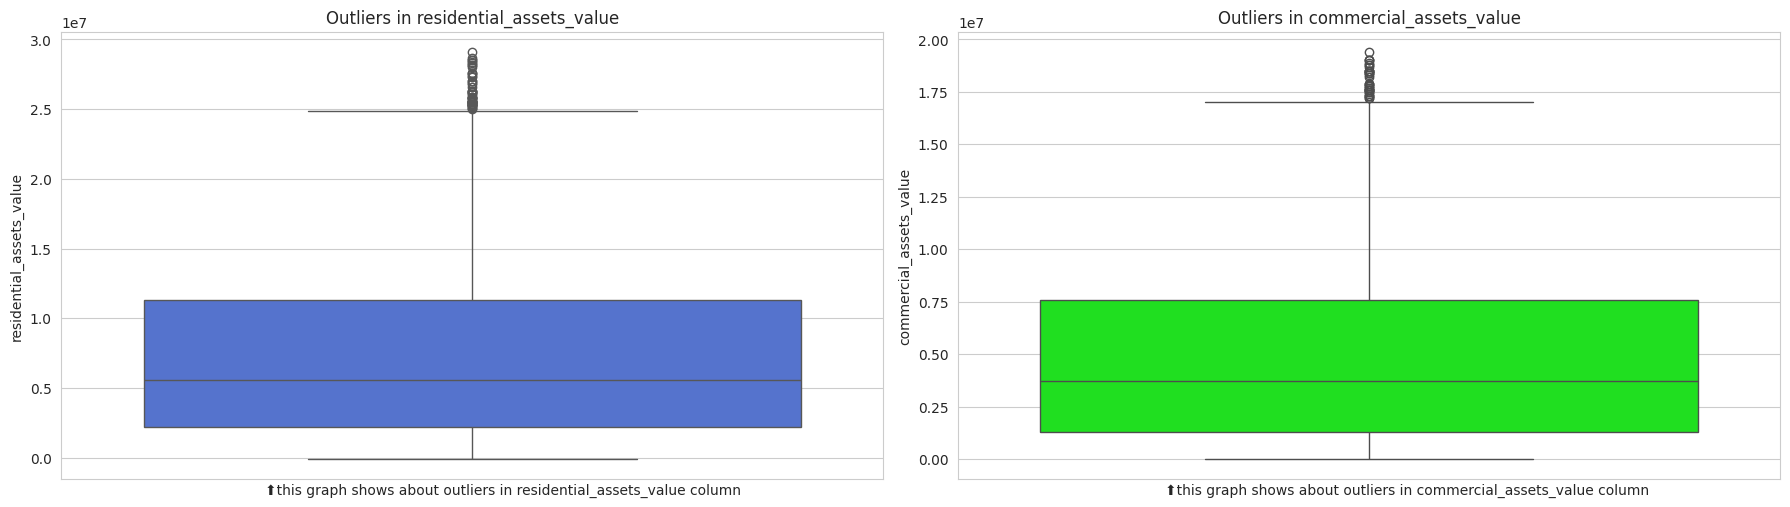

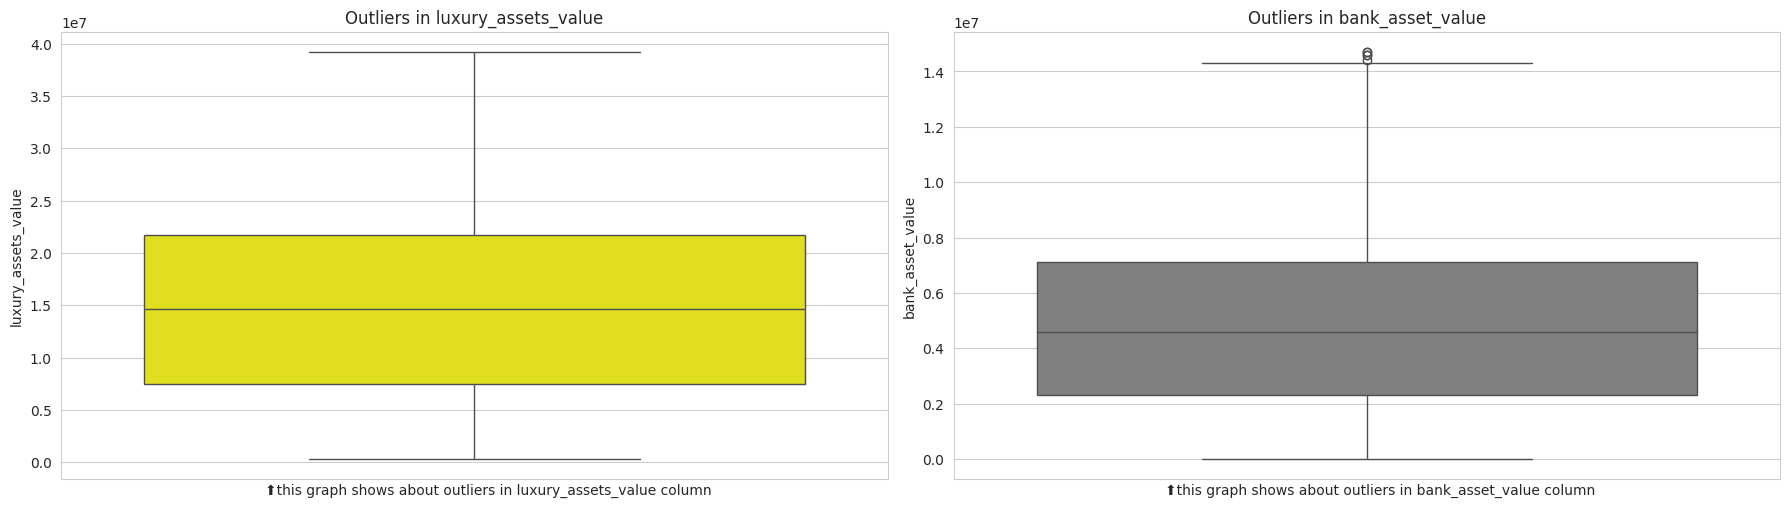

In [ ]:
####

sns.set_style("whitegrid")
fig,axes = plt.subplots(1,2, figsize=(18,5))


sns.boxplot(df["residential_assets_value"],color="royalblue",ax=axes[0])
axes[0].set_title("Outliers in residential_assets_value")
plt.figtext(0.15,0.001,"⬆️this graph shows about outliers in residential_assets_value column")

sns.boxplot(df["commercial_assets_value"],color="lime",ax = axes[1])
axes[1].set_title("Outliers in commercial_assets_value")
plt.figtext(0.65,0.001,"⬆️this graph shows about outliers in commercial_assets_value column")

plt.tight_layout()
plt.show()

####

sns.set_style("whitegrid")
fig,axes = plt.subplots(1,2, figsize=(18,5))

sns.boxplot(df["luxury_assets_value"],color="yellow",ax=axes[0])
axes[0].set_title("Outliers in luxury_assets_value")
plt.figtext(0.15,0.001,"⬆️this graph shows about outliers in luxury_assets_value column")

sns.boxplot(df["bank_asset_value"],color="grey",ax=axes[1])
axes[1].set_title("Outliers in bank_asset_value")
plt.figtext(0.65,0.001,"⬆️this graph shows about outliers in bank_asset_value column")

plt.tight_layout()
plt.show()

In [ ]:
### remove outliers by using IQR method
def remove_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*100
  upper_bound = Q3+1.5*100
  return df[( df[column] >= lower_bound ) & ( df[column] <= upper_bound )]

df_cleaned = remove_outliers("residential_assets_value")
df_cleaned = remove_outliers("commercial_assets_value")
df_cleaned = remove_outliers("bank_asset_value")

df_cleaned.shape

(2188, 13)

In [ ]:
df_cleaned.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected


In [ ]:
label_encoder = {}
for col in ["education","self_employed","loan_status"]:
  df_cleaned[col] = df_cleaned[col].fillna("Unknown")
  le = LabelEncoder()
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
  label_encoder[col] = le

print(df_cleaned.head())

print(df_cleaned.dtypes)

   loan_id  no_of_dependents  education  self_employed  income_annum  \
1        2                 0          1              1       4100000   
4        5                 5          1              1       9800000   
5        6                 0          0              1       4800000   
6        7                 5          0              0       8700000   
7        8                 2          0              1       5700000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
1     12200000          8          417                   2700000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
1                  2200000              8800000           3300000            

<ipython-input-16-b79cc211f5f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna("Unknown")
<ipython-input-16-b79cc211f5f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-16-b79cc211f5f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

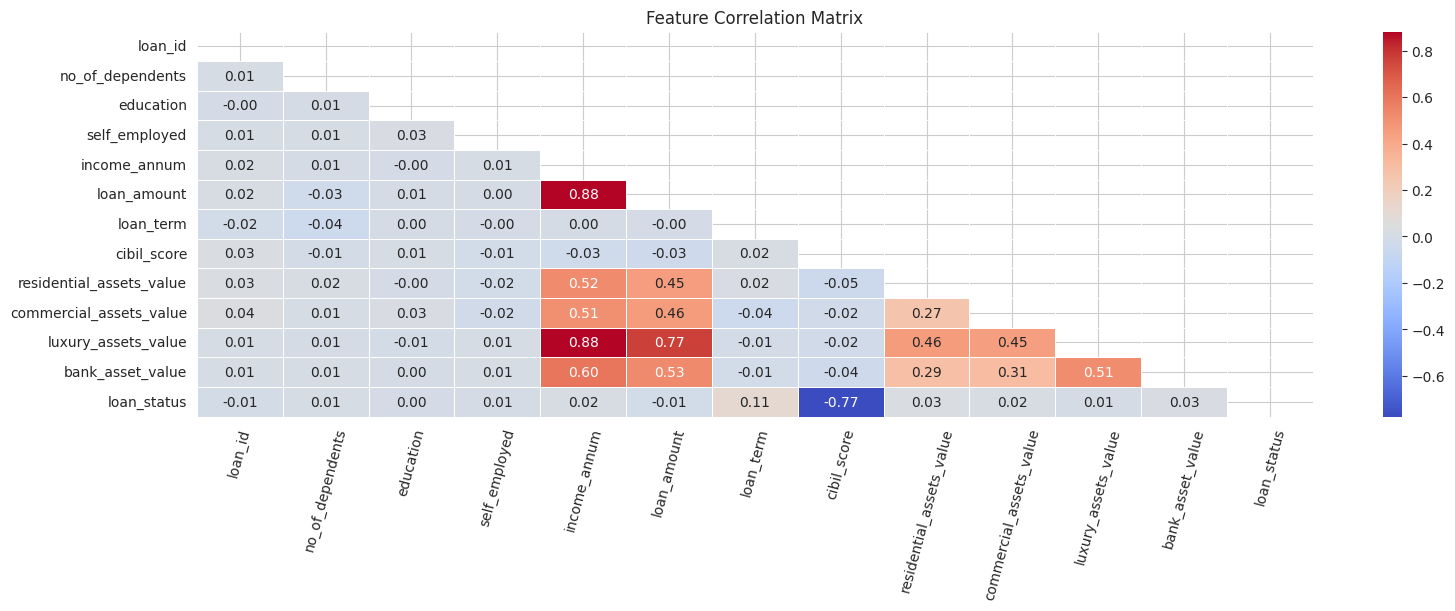

In [ ]:
### Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix calculate karo
corr_matrix = df_cleaned.corr()

# Lower triangle mask create karo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=75)  # X-axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()


In [ ]:
df_cleaned.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
# Drop low correlation columns
drop_cols = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
             'income_annum', 'loan_amount', 'residential_assets_value',
             'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

df_cleaned = df_cleaned.drop(columns=drop_cols)

print(df_cleaned.head())

   loan_term  cibil_score  loan_status
1          8          417            1
4         20          382            1
5         10          319            1
6          4          678            0
7         20          382            1
